
# 1. Understand the Data

In [1]:
import pandas as pd

df=pd.read_csv('data/20_record_per_town.csv')

print(f'shape : {df.shape}  \n')

df.columns = [name.strip() for name in list(df.columns)]

print(f'columns : {df.columns.to_list()}  \n')

print(f'info : \n{df.info()}')

##print(f'Reading : \n{df.describe()}')

shape : (520, 14)  

columns : ['address', 'closest_mrt', 'closest_mrt_dist', 'cbd_dist', 'month', 'town', 'flat_type', 'block', 'storey_range', 'floor_area_sqm', 'flat_model', 'resale_price', 'year', 'years_remaining']  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   address           520 non-null    object 
 1   closest_mrt       520 non-null    object 
 2   closest_mrt_dist  520 non-null    float64
 3   cbd_dist          520 non-null    float64
 4   month             520 non-null    object 
 5   town              520 non-null    object 
 6   flat_type         520 non-null    object 
 7   block             520 non-null    object 
 8   storey_range      520 non-null    object 
 9   floor_area_sqm    520 non-null    float64
 10  flat_model        520 non-null    object 
 11  resale_price      520 non-null    float64
 12  year     

# 2. Data Splitting


In [2]:
# select the dependent and target
#All Features: 'closest_mrt_dist', 'cbd_dist', 'floor_area_sqm', 'years_remaining','flat_model','town', 'storey_range'
numerical_features = ['closest_mrt_dist', 'cbd_dist', 'floor_area_sqm', 'years_remaining']
categorical_features = ['flat_model','town', 'storey_range']

X = df[ numerical_features + categorical_features ]
y=df['resale_price'].values

# Import the libary to split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3,
                                                    random_state=42)


# Print the size of the training and testing data
print(X_train.shape, X_test.shape)

(364, 7) (156, 7)


# 3. Use scikit-learn pipeline


In [3]:
## Import libraries

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

## Choose and Run only one of these Encoding Method and skip the unused encoding method

In [4]:
## One-Hot Encoding

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(),numerical_features ),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features )
    ])

# Define the pipeline
steps = [('preprocessor', preprocessor),
         ('poly', PolynomialFeatures(degree = 5, include_bias=False)),
         ('liReg', LinearRegression())]

pipeline = Pipeline(steps)

parameters = {"poly__degree":[1, 2, 3]}
poly_grid = GridSearchCV(pipeline, parameters,
                         cv=5,
                         scoring='neg_mean_squared_error',
                         verbose= True)

poly_grid.fit(X_train, y_train)



Fitting 5 folds for each of 3 candidates, totalling 15 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['closest_mrt_dist',
                                                                          'cbd_dist',
                                                                          'floor_area_sqm',
                                                                          'years_remaining']),
                                                                        ('cat',
                                                                         OneHotEncoder(handle_unknown='ignore'),
                                                                         ['flat_model',
                                                                          'town',
                                                                          'storey_range'])])),
                                       ('poly',
                                        PolynomialFeatures(degree=5,
                                                           include_bias=False)),
                                       ('liReg', LinearRegression())]),
             param_grid={'poly__degree': [1, 2, 3]},
             scoring='neg_mean_squared_error', verbose=True)

# (OR)

In [ ]:
## Label Encoding

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), categorical_features)
    ])

steps = [('preprocessor', preprocessor),
        ('poly', PolynomialFeatures(degree = 5, include_bias=False)),
        ('liReg', LinearRegression())]

pipeline = Pipeline(steps)

parameters = {"poly__degree":[1, 2, 3, 4, 5]}
poly_grid = GridSearchCV(pipeline, parameters,
                        cv=5,
                        scoring='neg_mean_squared_error',
                        verbose= True)

poly_grid.fit(X_train, y_train)

# 4. Check the parameters

In [5]:
best_parameters = poly_grid.best_params_

# print the values of the parameters
print ('best order is :', best_parameters)

best order is : {'poly__degree': 1}


# 5. Perform the predictions

In [6]:
#predict the sales for the testing data
ytest_pred = poly_grid.predict(X_test)

#predict the sales for the training data
ytrain_pred = poly_grid.predict(X_train)



# 6. Visualize the results


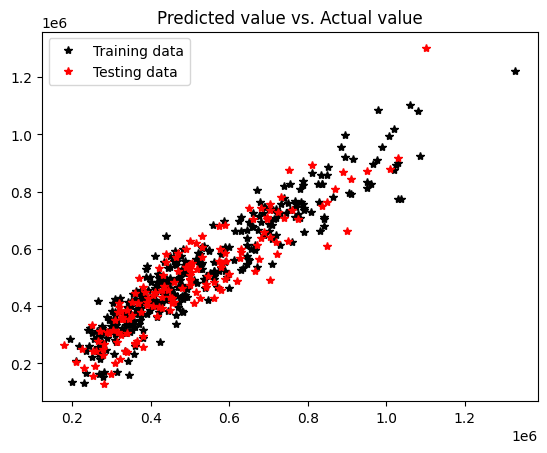

In [7]:
# import matplotlib for visualization

import matplotlib.pyplot as plt

plt.plot(  y_train, ytrain_pred, 'k*')
plt.plot(  y_test, ytest_pred, 'r*')

plt.title("Predicted value vs. Actual value")
plt.legend(["Training data", "Testing data"])
plt.show()

# 7. Evaluate the results using metrics


In [8]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# evauate on the training set
print('Training')
mae = mean_absolute_error(y_train, ytrain_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_train, ytrain_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_train, ytrain_pred)
print('R2 score is: ', r2)
print('\nTesting')
# evauate on the testing set
mae = mean_absolute_error(y_test, ytest_pred)
print('Mean absolute error: ', mae)
mse = mean_squared_error(y_test, ytest_pred)
print('Mean squared error: ', mse)
r2 = r2_score(y_test, ytest_pred)
print('R2 score is: ', r2)

Training
Mean absolute error:  54289.22767379502
Mean squared error:  4850046931.57604
R2 score is:  0.8833347011026791

Testing
Mean absolute error:  63138.07759990407
Mean squared error:  6148320881.161711
R2 score is:  0.8218869188914134


# Compare the results from One-Hot and Label Encoding Methods

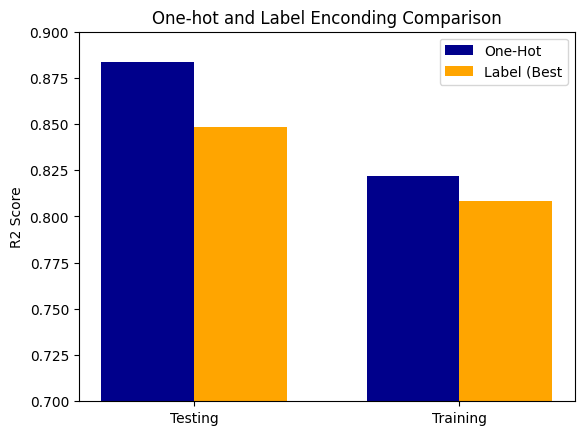

In [8]:
import matplotlib.pyplot as plt
import numpy as np



categories = ['Testing', 'Training']


## Enter the results of R2 scores here

one_hot_encoding = [0.8833347011026791, 0.8218869188914134]

label_encoding = [0.8482819779710573, 0.8083062515550115]





x = np.arange(len(categories))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()

# Plotting One-Hot bars
rects1 = ax.bar(x - width/2, one_hot_encoding, width, label='One-Hot', color='darkblue')

# Plotting RMSE bars
rects2 = ax.bar(x + width/2, label_encoding, width, label='Label (Best', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('R2 Score')
ax.set_ylim([0.7, 0.9])  # Setting Y scale from 0 to 1
ax.set_title('One-hot and Label Enconding Comparison')
ax.set_xticks(x)
ax.set_xticklabels(categories)
ax.legend()

# Display the plot
plt.show()